<a href="https://colab.research.google.com/github/saisuresh1999/Pothole/blob/master/FinalPotholePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals #l

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder



In [0]:
!pip install flask-ngrok

In [0]:
from flask_ngrok import run_with_ngrok
from flask import Flask
from flask import Flask, request, jsonify

In [0]:
import base64


In [0]:


try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf


In [0]:
#from tensorflow.contrib import lite

In [0]:
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
from keras import backend as K
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib
import random as rn
import pathlib

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [0]:
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import keras.preprocessing.image as img
from keras.applications.resnet50 import ResNet50


In [0]:
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

import tensorflow_hub as hub


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
for dirname, _, filenames in os.walk('/content/drive/My Drive/sihPotholeDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        #print(dirname)

/content/drive/My Drive/sihPotholeDataset/train/Pothole/1.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/10.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/12.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/11.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/13.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/14.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/17.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/16.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/18.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/15.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/19.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/21.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/23.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/2.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/24.jpg
/content/drive/My Drive/sihPotholeDataset/train/Pothole/2

In [0]:
os.listdir('/content/drive/My Drive/sihPotholeDataset/train')


['Pothole', 'Plain']

In [0]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
X=[]
Z=[]
IMG_SIZE=256
Plain='/content/drive/My Drive/sihPotholeDataset/train/Plain'
Pothole='/content/drive/My Drive/sihPotholeDataset/train/Pothole'

make_train_data('Plain',Plain)
make_train_data('Pothole',Pothole)
print(Z)

100%|██████████| 25/25 [00:00<00:00, 68.63it/s]

['Plain', 'Plain', 'Plain', 'Plain', 'Plain', 'Plain', 'Plain', 'Plain', 'Plain', 'Plain', 'Plain', 'Plain', 'Plain', 'Plain', 'Plain', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole', 'Pothole']


In [0]:
'''fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')'''

"fig,ax=plt.subplots(2,5)\nplt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)\nfig.set_size_inches(10,10)\n\nfor i in range(2):\n    for j in range (5):\n        l=rn.randint(0,len(Z))\n        ax[i,j].imshow(X[l][:])\n        ax[i,j].set_title(Z[l])\n        ax[i,j].set_aspect('equal')"

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1337)

np.random.seed(42)
rn.seed(42)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
#print(tf.__version__)

base_model=tf.keras.applications.MobileNet(include_top=False, weights='imagenet',input_shape=(256,256,3), pooling='max')
base_model.trainable=True
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 257, 257, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 128, 128, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 128, 128, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 128, 128, 32

In [0]:
#model=Sequential()
#model.add(base_model)
#model.add(Dropout(0.20))
#model.add(Dense(2048,activation='relu'))
#model.add(Dense(1024,activation='relu'))
#model.add(Dense(512,activation='relu'))
#model.add(Dense(2,activation='softmax' ,name='output'))
def create_model():
  model=tf.keras.models.Sequential()
  model.add(base_model)
  model.add(tf.keras.layers.Dropout(0.20))
  model.add(tf.keras.layers.Dense(2048,activation='relu'))
  model.add(tf.keras.layers.Dense(1024,activation='relu'))
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dense(2,activation='sigmoid' ,name='output'))
  model.build()
  #model.summary()

  epochs=50
  batch_size=128
  red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
  base_model.trainable=True # setting the VGG model to be trainable.
  opt = tf.keras.optimizers.Adam(lr=1e-5, decay=1e-6)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [0]:
model=create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1024)              3228864   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_26 (Dense)             (None, 512)               524800    
_________________________________________________________________
output (Dense)               (None, 2)                 1026      
Total params: 7,952,066
Trainable params: 7,930,178
Non-trainable params: 21,888
_______________________________________

In [0]:
checkpoint_path = "training_1/pothole_cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)


In [0]:
History = model.fit(x_train, y_train, epochs=50, validation_data=(x_test,y_test), callbacks=[cp_callback])


Train on 30 samples, validate on 10 samples
Epoch 1/50

Epoch 00001: saving model to training_1/pothole_cp.ckpt
30/30 [==============================] - 3s 109ms/sample - loss: 3.0801 - accuracy: 0.3000 - val_loss: 0.9918 - val_accuracy: 0.6000
Epoch 2/50

Epoch 00002: saving model to training_1/pothole_cp.ckpt
30/30 [==============================] - 3s 86ms/sample - loss: 2.3238 - accuracy: 0.3000 - val_loss: 0.8695 - val_accuracy: 0.6000
Epoch 3/50

Epoch 00003: saving model to training_1/pothole_cp.ckpt
30/30 [==============================] - 2s 54ms/sample - loss: 1.6153 - accuracy: 0.3000 - val_loss: 0.8398 - val_accuracy: 0.6000
Epoch 4/50

Epoch 00004: saving model to training_1/pothole_cp.ckpt
30/30 [==============================] - 1s 19ms/sample - loss: 1.0200 - accuracy: 0.3000 - val_loss: 0.7273 - val_accuracy: 0.6000
Epoch 5/50

Epoch 00005: saving model to training_1/pothole_cp.ckpt
30/30 [==============================] - 3s 86ms/sample - loss: 0.7315 - accuracy: 0.30

In [0]:
model = create_model()

loss, acc = model.evaluate(x_test,y_test, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))


10/10 - 0s - loss: 0.7078 - accuracy: 0.4000
Untrained model, accuracy: 40.00%


In [0]:
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss,acc = model.evaluate(x_test,y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


10/10 - 0s - loss: 0.7980 - accuracy: 0.4000
Restored model, accuracy: 40.00%


In [0]:
checkpoint_path = "training_2/pothole_cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,    verbose=1,   save_weights_only=True,   period=5)



In [0]:
model = create_model()

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model.fit(x_train, y_train, epochs=50, validation_data=(x_test,y_test), callbacks=[cp_callback])


Train on 30 samples, validate on 10 samples
Epoch 1/50
30/30 [==============================] - 3s 96ms/sample - loss: 0.6329 - accuracy: 0.7000 - val_loss: 0.7662 - val_accuracy: 0.4000
Epoch 2/50
30/30 [==============================] - 0s 11ms/sample - loss: 0.6490 - accuracy: 0.7000 - val_loss: 0.7736 - val_accuracy: 0.4000
Epoch 3/50
30/30 [==============================] - 0s 10ms/sample - loss: 0.5376 - accuracy: 0.7000 - val_loss: 0.7974 - val_accuracy: 0.4000
Epoch 4/50
30/30 [==============================] - 0s 11ms/sample - loss: 0.5337 - accuracy: 0.7000 - val_loss: 0.8173 - val_accuracy: 0.4000
Epoch 5/50

Epoch 00005: saving model to training_2/pothole_cp-0005.ckpt
30/30 [==============================] - 1s 21ms/sample - loss: 0.5688 - accuracy: 0.7000 - val_loss: 0.8021 - val_accuracy: 0.4000
Epoch 6/50
30/30 [==============================] - 0s 11ms/sample - loss: 0.4454 - accuracy: 0.7000 - val_loss: 0.8027 - val_accuracy: 0.4000
Epoch 7/50
30/30 [==================

In [0]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/pothole_cp-0050.ckpt'

In [0]:
model = create_model()

# Load the previously saved weights
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(x_test,y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


10/10 - 0s - loss: 0.3040 - accuracy: 0.9000
Restored model, accuracy: 90.00%


In [0]:
path = "/content/drive/My Drive/sihPotholeDataset/test/Pothole"
files = os.listdir(path)
files

['531.jpg',
 '593.jpg',
 '602.jpg',
 '598.jpg',
 '610.jpg',
 '605.jpg',
 '617.jpg',
 '618.jpg']

In [0]:
def predict():
    for i in tqdm(files):
        pth = os.path.join(path,i)
        X = cv2.imread(pth,cv2.IMREAD_COLOR)
        X = cv2.resize(X,(256,256))
        plt.figure()
        plt.imshow(X[:,:,::-1]) 
        plt.show()  

        X = np.array(X)
        X = np.expand_dims(X, axis=0)
        dummy=model.predict(X)
        print(dummy)
        y_pred = np.round(dummy)
        if y_pred[0][0] == 1:
            print("Plain Road")
        else:
            print("Pothole Road")

  0%|          | 0/8 [00:00<?, ?it/s]

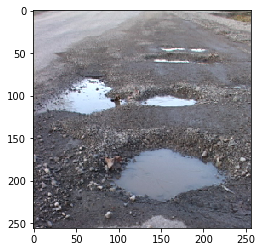

 12%|█▎        | 1/8 [00:00<00:03,  1.83it/s]

[[9.1186092e-05 1.0295422e-02]]
Pothole Road


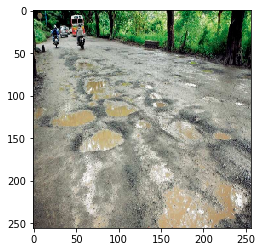

 25%|██▌       | 2/8 [00:00<00:02,  2.24it/s]

[[9.398390e-05 6.567285e-03]]
Pothole Road


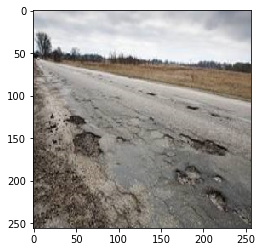

 38%|███▊      | 3/8 [00:00<00:01,  2.63it/s]

[[0.00010759 0.00255574]]
Pothole Road


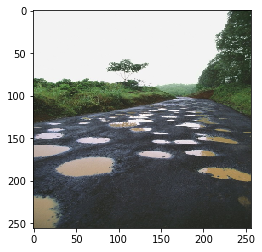

 50%|█████     | 4/8 [00:01<00:01,  3.07it/s]

[[4.3995817e-05 3.5688384e-03]]
Pothole Road


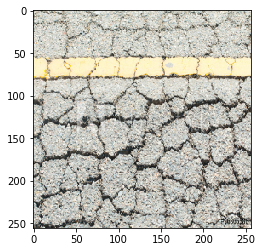

 62%|██████▎   | 5/8 [00:01<00:00,  3.42it/s]

[[0.05549516 0.11654801]]
Pothole Road


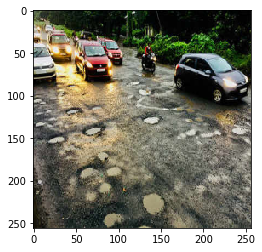

 75%|███████▌  | 6/8 [00:01<00:00,  3.69it/s]

[[1.0324329e-05 9.7010704e-03]]
Pothole Road


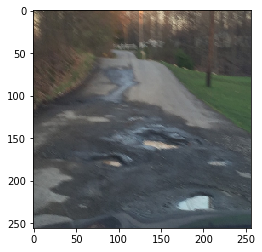

 88%|████████▊ | 7/8 [00:01<00:00,  3.89it/s]

[[5.4560232e-06 7.9437828e-04]]
Pothole Road


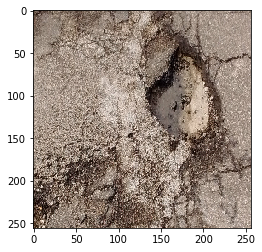

100%|██████████| 8/8 [00:02<00:00,  3.95it/s]

[[0.00029472 0.05754652]]
Pothole Road


In [0]:
predict()

In [0]:
path = "/content"
files = os.listdir(path)
files

['.config', 'drive', 'training_1', 'training_2', 'sample_data']

In [0]:
'''app = Flask(__name__)
run_with_ngrok(app)
@app.route('/',methods=['POST'])
def home():
    img = request.get_json().get("image")
    with open("image", "wb") as fh:
        fh.write(base64.b64decode(img))
    main = {"result":"server error"}

    path = "image"
    #pth = os.path.join(path,i)
    X = cv2.imread(path,cv2.IMREAD_COLOR)
    X = cv2.resize(X,(256,256))
    plt.figure()
    plt.imshow(X[:,:,::-1]) 
    plt.show()  
    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    dummy=model.predict(X)
    print(dummy)
    y_pred = np.round(dummy)
    if y_pred[0][0] == 1:
        main = {"result":"plain"}
        print("Plain Road")
    else:
        main = {"result":"pothole"}
        print("Pothole Road") 
    #files = os.listdir(path)

    #for i in tqdm(files):

             
        
      
    return jsonify(main)
  
app.run()'''

'app = Flask(__name__)\nrun_with_ngrok(app)\n@app.route(\'/\',methods=[\'POST\'])\ndef home():\n    img = request.get_json().get("image")\n    with open("image", "wb") as fh:\n        fh.write(base64.b64decode(img))\n    main = {"result":"server error"}\n\n    path = "image"\n    #pth = os.path.join(path,i)\n    X = cv2.imread(path,cv2.IMREAD_COLOR)\n    X = cv2.resize(X,(256,256))\n    plt.figure()\n    plt.imshow(X[:,:,::-1]) \n    plt.show()  \n    X = np.array(X)\n    X = np.expand_dims(X, axis=0)\n    dummy=model.predict(X)\n    print(dummy)\n    y_pred = np.round(dummy)\n    if y_pred[0][0] == 1:\n        main = {"result":"plain"}\n        print("Plain Road")\n    else:\n        main = {"result":"pothole"}\n        print("Pothole Road") \n    #files = os.listdir(path)\n\n    #for i in tqdm(files):\n\n             \n        \n      \n    return jsonify(main)\n  \napp.run()'